In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test']


#**Understanding Dataset**

In [18]:
pd.options.display.precision=15
train=pd.read_csv("../input/train.csv",nrows=10000000,dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
train.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [19]:
train.rename({"acoustic_data":"sinyal","time_to_failure":"time"},axis="columns",inplace=True)
train.head()

,sinyal,time
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [20]:
tests=os.listdir("../input/test")
print(tests[0:3])
len(tests)

['seg_d35274.csv', 'seg_7bec10.csv', 'seg_fbf17a.csv']


2624

In [21]:
sample_submission=pd.read_csv("../input/sample_submission.csv")
sample_submission.head(2)

,seg_id,time_to_failure
0,seg_00030f,0
1,seg_0012b5,0


In [22]:
print(len(sample_submission))

2624


In [23]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sinyal,10000000.0,4.502072300000000,17.807072466151062,-4621.00000000000000,2.000000000000,4.00000000000,7.00000000000,3252.000000000
time,10000000.0,5.183597857290694,5.091285869422851,0.00079547982295,0.649897064645,1.29889864835,10.89169840325,11.540799987


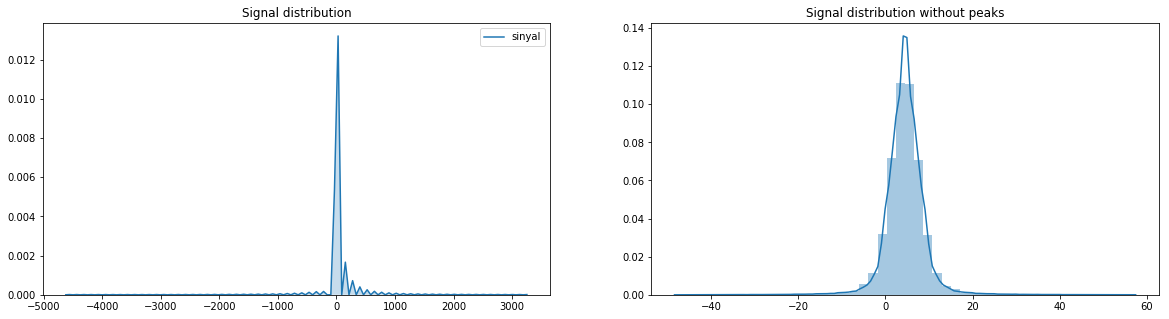

In [24]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].set_title("Signal distribution")
ax[1].set_title("Signal distribution without peaks");

sns.kdeplot(train.sinyal,ax=ax[0],shade=True);
low = train.sinyal.mean() - 3 * train.sinyal.std()
high = train.sinyal.mean() + 3 * train.sinyal.std() 
sns.distplot(train.loc[(train.sinyal >= low) & (train.sinyal <= high), "sinyal"].values,ax=ax[1]);

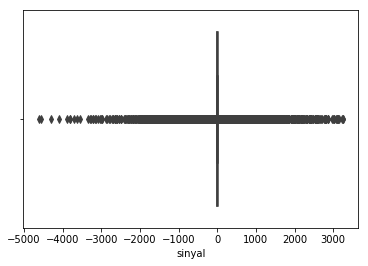

In [25]:
sns.boxplot(x="sinyal",data=train)